# Test backend (pose graph)

In [1]:
import numpy as np

from graphslam.load import load_g2o_se3
from graphslam.graph import Graph
from graphslam.vertex import Vertex
from graphslam.pose.se3 import PoseSE3
from graphslam.edge.edge_odometry import EdgeOdometry

from planeslam.geometry.util import R_to_quat

%load_ext autoreload
%autoreload 2

## Perfect measurements

In [2]:
# Node positions
nodes = []
node_positions = np.array([[0, 0, 0],
                           [1, 0, 0],
                           [2, 0, 0],
                           [3, 0, 0],
                           [4, 0, 0],
                           [5, 0, 0]])

N = len(node_positions)
for i, pos in enumerate(node_positions):
    p = PoseSE3(pos, R_to_quat(np.eye(3)))
    nodes.append(Vertex(i, p))

In [3]:
# Lidar odometry edges
# R = I for all edges
lidar_edges = []

lidar_ts = np.diff(node_positions, axis=0)
lidar_R = np.eye(3)
for i, t in enumerate(lidar_ts):
    estimate = PoseSE3(t, R_to_quat(np.eye(3)))
    e = EdgeOdometry([i, i+1], np.eye(6), estimate)
    lidar_edges.append(e)

In [4]:
# GPS position measurements
GPS_positions = np.array([[0, 0, 0],
                          [1, 0, 0],
                          [2, 0, 0],
                          [3, 0, 0],
                          [4, 0, 0],
                          [5, 0, 0]])

gps_nodes = []
gps_edges = []
for i, pos in enumerate(GPS_positions):
    # Create node at GPS position
    p = PoseSE3(pos, R_to_quat(np.eye(3)))
    gps_nodes.append(Vertex(i+N, p))
    # Connect with (R=I,t=0) edge
    estimate = PoseSE3(np.zeros(3), R_to_quat(np.eye(3)))
    e = EdgeOdometry([i, i+N], np.eye(6), estimate)
    gps_edges.append(e)

In [5]:
graph = Graph(lidar_edges + gps_edges, nodes + gps_nodes)

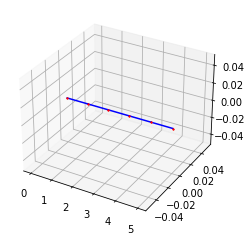

In [6]:
graph.plot(vertex_markersize=1)

In [7]:
graph.calc_chi2()

0.0

In [8]:
graph.optimize()


Iteration                chi^2        rel. change
---------                -----        -----------
        0               0.0000
        1               0.0000          -0.000000
        2               0.0000          -0.000000
        3               0.0000          -0.000000
        4               0.0000          -0.000000
        5               0.0000          -0.000000
        6               0.0000          -0.000000
        7               0.0000          -0.000000
        8               0.0000          -0.000000
        9               0.0000          -0.000000
       10               0.0000          -0.000000
       11               0.0000          -0.000000
       12               0.0000          -0.000000
       13               0.0000          -0.000000
       14               0.0000          -0.000000
       15               0.0000          -0.000000
       16               0.0000          -0.000000
       17               0.0000          -0.000000
       18         

## "Spoofed" GPS measurements

In [9]:
# GPS position measurements
GPS_positions = np.array([[0, 0, 0],
                          [1, 0, 0],
                          [2, 10, 0],  # Spoofed
                          [3, 0, 0],
                          [4, 0, 0],
                          [5, 0, 0]])

gps_nodes = []
gps_edges = []
for i, pos in enumerate(GPS_positions):
    # Create node at GPS position
    p = PoseSE3(pos, R_to_quat(np.eye(3)))
    gps_nodes.append(Vertex(i+N, p))
    # Connect with (R=I,t=0) edge
    estimate = PoseSE3(np.zeros(3), R_to_quat(np.eye(3)))
    e = EdgeOdometry([i, i+N], np.eye(6), estimate)
    gps_edges.append(e)

In [10]:
graph = Graph(lidar_edges + gps_edges, nodes + gps_nodes)

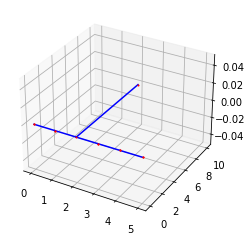

In [11]:
graph.plot(vertex_markersize=1)

In [12]:
graph.calc_chi2()

100.0

In [13]:
graph.optimize()


Iteration                chi^2        rel. change
---------                -----        -----------
        0             100.0000
        1               0.0000          -1.000000
        2               0.0000          -0.000000
        3               0.0000          -0.000000
        4               0.0000          -0.000000
        5               0.0000          -0.000000
        6               0.0000          -0.000000
        7               0.0000          -0.000000
        8               0.0000          -0.000000
        9               0.0000          -0.000000
       10               0.0000          -0.000000
       11               0.0000          -0.000000
       12               0.0000          -0.000000
       13               0.0000          -0.000000
       14               0.0000          -0.000000
       15               0.0000          -0.000000
       16               0.0000          -0.000000
       17               0.0000          -0.000000
       18         

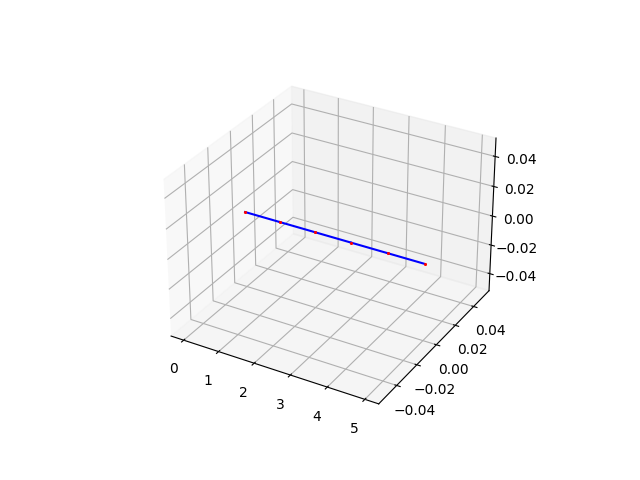

In [31]:
graph.plot(vertex_markersize=1)

In [33]:
for i, v in enumerate(graph._vertices):
    print(v.pose.position)

[0. 0. 0.]
[1. 0. 0.]
[2. 0. 0.]
[3. 0. 0.]
[4. 0. 0.]
[5. 0. 0.]
[0. 0. 0.]
[1. 0. 0.]
[2. 0. 0.]
[3. 0. 0.]
[4. 0. 0.]
[5. 0. 0.]
